##Importing File


In [ ]:
from google.colab import drive
drive.mount('/CYSE-499-AI-Final')

Mounted at /CYSE-499-AI-Final


In [ ]:
!ls /CYSE-499-AI-Final/MyDrive/CYSE-499-AI-Final

Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks-EDITED-ONLYBRUTEFORCE.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks-EDITED-ONLYBRUTEFORCE.pcap_ISCX.gsheet


In [ ]:
import pandas as pd
file_path = '/CYSE-499-AI-Final/MyDrive/CYSE-499-AI-Final/Thursday-WorkingHours-Morning-WebAttacks-EDITED-ONLYBRUTEFORCE.pcap_ISCX.csv'
df = pd.read_csv(file_path, encoding='latin1')
display(df.head())

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.217.6.194-192.168.10.25-443-49229-6,192.168.10.25,49229,172.217.6.194,443,6,6/7/2017 9:20,2304336,56,63,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.25-23.52.146.2-49233-443-6,192.168.10.25,49233,23.52.146.2,443,6,6/7/2017 9:20,62419477,10,7,...,32,613363.0,0.0,613363.0,613363.0,61800000.0,0.0,61800000.0,61800000.0,BENIGN
2,192.168.10.25-23.52.146.2-49231-443-6,192.168.10.25,49231,23.52.146.2,443,6,6/7/2017 9:20,62427560,21,18,...,32,1563321.0,0.0,1563321.0,1563321.0,60900000.0,0.0,60900000.0,60900000.0,BENIGN
3,192.168.10.25-23.52.146.2-49232-443-6,192.168.10.25,49232,23.52.146.2,443,6,6/7/2017 9:20,62425097,12,7,...,32,1064734.0,0.0,1064734.0,1064734.0,61400000.0,0.0,61400000.0,61400000.0,BENIGN
4,172.217.3.102-192.168.10.25-443-49242-6,192.168.10.25,49242,172.217.3.102,443,6,6/7/2017 9:20,62394607,13,8,...,32,237144.0,0.0,237144.0,237144.0,62200000.0,0.0,62200000.0,62200000.0,BENIGN


In [ ]:
# Finding all unique protocols to make mappings later
print(df[' Protocol'].unique())

[ 6 17  0]


In [ ]:
import numpy as np
# modify label column to be 1 or 0. Anything other than BENIGN is 1
df[' Label'] = df[' Label'].apply(lambda x: 0 if str(x).strip().upper() == 'BENIGN' else 1)

# change the number of the protocol to its name, found this mapping online
protocol_map = {
    1: 'ICMP',
    0: 'HOPOPT',
    6: 'TCP',
    17: 'UDP'
}

df['Updated Protocol Name'] = df[' Protocol'].map(protocol_map).fillna('UNKNOWN')

# create Flow ID Plus column, which keeps track of destination, source, dest port, source port, protocol name and label
# integrating text labels which BERT may like
df['Flow ID Plus'] = 'Destination IP' + df[' Destination IP'].astype(str) + ' - ' + \
                     'Source IP' + df[' Source IP'].astype(str) + ' - ' + \
                     'Destination Port' + df[' Destination Port'].astype(str) + ' - ' + \
                     'Source Port' + df[' Source Port'].astype(str) + ' - ' + \
                     'Protocol Name' + df['Updated Protocol Name'].astype(str)
# print statement once complete
print("DataFrame modifications complete.")
display(df.head())

DataFrame modifications complete.


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Updated Protocol Name,Flow ID Plus
0,172.217.6.194-192.168.10.25-443-49229-6,192.168.10.25,49229,172.217.6.194,443,6,6/7/2017 9:20,2304336,56,63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,TCP,Destination IP172.217.6.194 - Source IP192.168...
1,192.168.10.25-23.52.146.2-49233-443-6,192.168.10.25,49233,23.52.146.2,443,6,6/7/2017 9:20,62419477,10,7,...,0.0,613363.0,613363.0,61800000.0,0.0,61800000.0,61800000.0,0,TCP,Destination IP23.52.146.2 - Source IP192.168.1...
2,192.168.10.25-23.52.146.2-49231-443-6,192.168.10.25,49231,23.52.146.2,443,6,6/7/2017 9:20,62427560,21,18,...,0.0,1563321.0,1563321.0,60900000.0,0.0,60900000.0,60900000.0,0,TCP,Destination IP23.52.146.2 - Source IP192.168.1...
3,192.168.10.25-23.52.146.2-49232-443-6,192.168.10.25,49232,23.52.146.2,443,6,6/7/2017 9:20,62425097,12,7,...,0.0,1064734.0,1064734.0,61400000.0,0.0,61400000.0,61400000.0,0,TCP,Destination IP23.52.146.2 - Source IP192.168.1...
4,172.217.3.102-192.168.10.25-443-49242-6,192.168.10.25,49242,172.217.3.102,443,6,6/7/2017 9:20,62394607,13,8,...,0.0,237144.0,237144.0,62200000.0,0.0,62200000.0,62200000.0,0,TCP,Destination IP172.217.3.102 - Source IP192.168...


In [ ]:
# install hugging face transformers
!pip install transformers accelerate sentencepiece

##Tokenization and Loading Base Model

In [ ]:
# load model and tokenizer
from transformers import AutoTokenizer, AutoModel
# using base version of BERT, specifically for Hugging Face
model_name = 'bert-base-uncased'
# initialize auto tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
# load pre-trained BERT model
model = AutoModel.from_pretrained(model_name)
# print model name, tokenizer
print(f'Successfully loaded tokenizer and model for {model_name}.')
print(f'Tokenizer: {type(tokenizer).__name__}')
print(f'Model: {type(model).__name__}')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Successfully loaded tokenizer and model for bert-base-uncased.
Tokenizer: BertTokenizerFast
Model: BertModel


In [ ]:
# get only Flow ID Plus column and convert everything to string
texts = df['Flow ID Plus'].astype(str).tolist()
# tokenize texts, pt argument returns PyTorch tensors
encodings = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
print(f'Successfully tokenized {len(texts)} texts.')
print(f'Shape of input_ids: {encodings["input_ids"].shape}')
print(f'Shape of attention_mask: {encodings["attention_mask"].shape}')

Successfully tokenized 46192 texts.
Shape of input_ids: torch.Size([46192, 42])
Shape of attention_mask: torch.Size([46192, 42])


##Splitting of dataset for test and train

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader, random_split
# custom PyTorch Dataset class
class TrafficDataset(Dataset):
    #takes encodings and labels as arguements
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    #gets the encoding and label for an item
    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item
# convert Label column to PyTorch tensor
labels = torch.tensor(df[' Label'].values.astype(int))

# create an instance of the TrafficDataset with the encodings and labels created previously
dataset = TrafficDataset(encodings, labels)

# modify this percentage to choose how much of the dataset is used, right now at 100%
subset_percent = 1

# Calculate the size of the total subset to be used
total_subset_size = int(subset_percent * len(dataset))

# create the subset from the original dataset
subset_to_use, _ = random_split(dataset, [total_subset_size, len(dataset) - total_subset_size])

# training split of the subset
training_split_percent = 0.7

# split the 'subset_to_use' into training and testing
train_size = int(training_split_percent * len(subset_to_use))
test_size = len(subset_to_use) - train_size
train_dataset, test_dataset = random_split(subset_to_use, [train_size, test_size])

# extract labels corresponding to the train_dataset
train_labels = labels[train_dataset.indices]

# calculate how many of each class (0 and 1) within train_labels
class_counts = torch.bincount(train_labels)

# calculate the inverse frequency weights for each class
num_classes = len(class_counts)

# create a tensor of zeros, then fills in counts for existing classes. This will be used for creating weights for 0 and 1
full_class_counts = torch.zeros(2, dtype=torch.float32)
for i in range(len(class_counts)):
    if i < 2:
        full_class_counts[i] = class_counts[i]

# calculate total samples for classes present
total_samples_in_train_subset = len(train_labels)

# calculate class weights: total_samples / (num_classes * count_of_class)
# add a small epsilon to avoid division by zero
epsilon = 1e-2
class_weights = total_samples_in_train_subset / (num_classes * (full_class_counts + epsilon))

# convert to PyTorch tensor (already done by torch operations)
class_weights = class_weights.to(torch.float32)

print(f"Calculated Class Weights: {class_weights}")

# set batch size
batch_size = 64

# create dataLoader instances for both sets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Total original dataset size: {len(dataset)}")
print(f"Total samples used for training and testing (approx {subset_percent*100}%): {len(subset_to_use)}")
print(f"Training set size ({round(subset_percent * training_split_percent * 100, 2)}% of original): {len(train_dataset)}")
print(f"Testing set size ({round(subset_percent * (1 - training_split_percent) * 100, 2)}% of original): {len(test_dataset)}")
print(f"Batch size: {batch_size}")
print(f"Number of batches in training set: {len(train_loader)}")
print(f"Number of batches in testing set: {len(test_loader)}")

print("DataLoaders created successfully.")

Calculated Class Weights: tensor([ 0.5168, 15.4117])
Total original dataset size: 46192
Total samples used for training and testing (approx 100%): 46192
Training set size (70.0% of original): 32334
Testing set size (30.0% of original): 13858
Batch size: 64
Number of batches in training set: 506
Number of batches in testing set: 217
DataLoaders created successfully.


## Training and Testing



In [ ]:
from transformers import BertForSequenceClassification
from torch.optim import AdamW
import torch

# determine the device used for training. GPU was the best option for speed in training the BERT model
device = torch.device('cuda' if torch.cuda.is_available() else 'gpu')
print(f"Using device: {device}")

# two labels for binary classification, 0 for BENIGN and 1 for MALICIOUS
num_labels = 2

# load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)

# move the model to the selected device
model.to(device)

# define the optimizer with the new learning rate
optimizer = AdamW(model.parameters(), lr=2e-5)

# define the weighted cross-entropy loss function
loss_fn = torch.nn.CrossEntropyLoss(weight=class_weights.to(device))

# initialize lists to store training and testing metrics
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# set the number of training epochs
epochs = 3

print(f"Starting training for {epochs} epochs...")

# used for keeping track of epoch and batch number
epoch_counter = 0
batch_counter = 0

for epoch in range(epochs):
    # training loop
    print("Epoch Number:" + str(epoch_counter))

    # set model to training mode
    model.train()

    # initialize all training values to 0
    total_train_loss = 0
    total_train_correct = 0
    total_train_samples = 0

    for batch in train_loader:
        print("Batch Number:" + str(batch_counter))

        # move batch data to the device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        # zero the gradients
        optimizer.zero_grad()

        # forward pass
        print("Starting forward pass")
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits

        # calculate loss using the weighted loss function
        loss = loss_fn(logits, labels)

        # backward pass and optimize
        print("Starting backward pass")
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        # calculate training accuracy
        preds = torch.argmax(logits, dim=1)
        total_train_correct += (preds == labels).sum().item()
        total_train_samples += labels.size(0)
        batch_counter += 1

    # calculate losses
    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = total_train_correct / total_train_samples
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)

    # set model to evaluation mode
    model.eval()

    # initialize all testing values
    total_test_loss = 0
    total_test_correct = 0
    total_test_samples = 0

    # evaluation loop
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask) # Modified forward pass
            logits = outputs.logits

            # Calculate loss using the weighted loss function
            loss = loss_fn(logits, labels) # Changed loss calculation

            total_test_loss += loss.item()

            # calculate testing accuracy
            preds = torch.argmax(logits, dim=1)
            total_test_correct += (preds == labels).sum().item()
            total_test_samples += labels.size(0)

    avg_test_loss = total_test_loss / len(test_loader)
    test_accuracy = total_test_correct / total_test_samples
    test_losses.append(avg_test_loss)
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}:\n"\
          f"  Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}\n"\
          f"  Test Loss: {avg_test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    epoch_counter += 1

print("Training finished.")

Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training for 3 epochs...
Epoch Number:0
Batch Number:0
Starting forward pass


/tmp/ipython-input-1521038931.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Starting backward pass
Batch Number:1
Starting forward pass
Starting backward pass
Batch Number:2
Starting forward pass
Starting backward pass
Batch Number:3
Starting forward pass
Starting backward pass
Batch Number:4
Starting forward pass
Starting backward pass
Batch Number:5
Starting forward pass
Starting backward pass
Batch Number:6
Starting forward pass
Starting backward pass
Batch Number:7
Starting forward pass
Starting backward pass
Batch Number:8
Starting forward pass
Starting backward pass
Batch Number:9
Starting forward pass
Starting backward pass
Batch Number:10
Starting forward pass
Starting backward pass
Batch Number:11
Starting forward pass
Starting backward pass
Batch Number:12
Starting forward pass
Starting backward pass
Batch Number:13
Starting forward pass
Starting backward pass
Batch Number:14
Starting forward pass
Starting backward pass
Batch Number:15
Starting forward pass
Starting backward pass
Batch Number:16
Starting forward pass
Starting backward pass
Batch Numb

## Evaluation Metrics: Confusion Matrix and ROC Curve

/tmp/ipython-input-1521038931.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


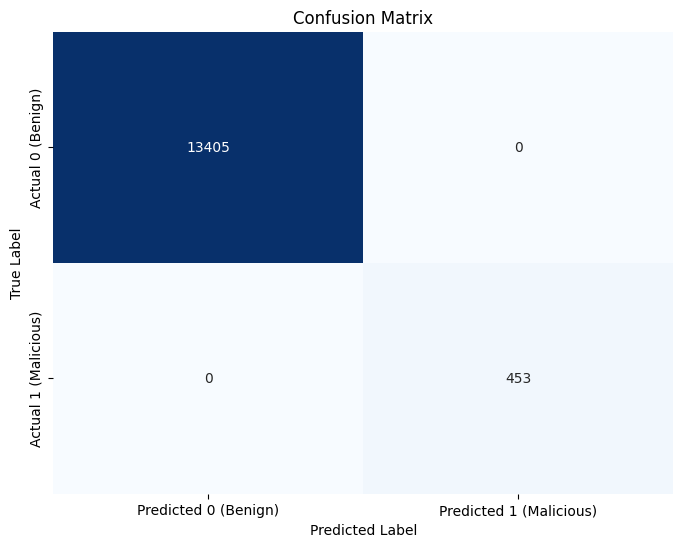

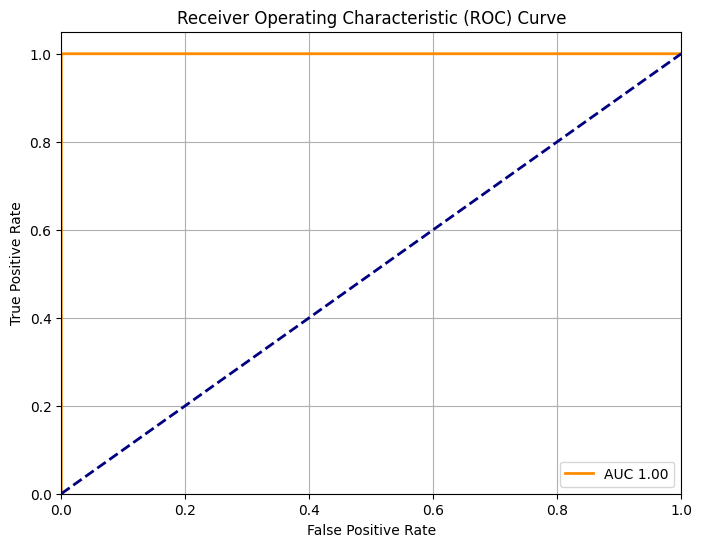

Confusion Matrix:
[[13405     0]
 [    0   453]]
ROC AUC: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        # get probability of the positive class
        probabilities = torch.softmax(logits, dim=1)[:, 1]

        preds = torch.argmax(logits, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(probabilities.cpu().numpy())

# convert lists to numpy arrays
all_preds = np.array(all_preds)
all_labels = np.array(all_labels)
all_probs = np.array(all_probs)

# confusion Matrix
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (Benign)', 'Predicted 1 (Malicious)'],
            yticklabels=['Actual 0 (Benign)', 'Actual 1 (Malicious)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"Confusion Matrix:\n{cm}")
print(f"ROC AUC: {roc_auc:.2f}")